<a href="https://colab.research.google.com/github/yansonchiang/tomcat-image-example/blob/master/0820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 MNIST手寫辨識

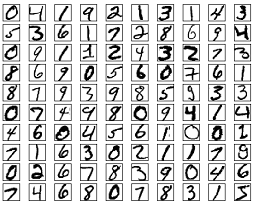

## Data Preprocessing
獲得資料時，我們須進行一些「資料前處理」，符合模型的架構。

從keras內建的資料集取出mnist dataset，並在載入時將資料歸類

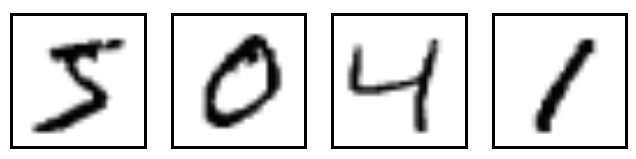

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import np_utils

# load the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Check data shape

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Check images

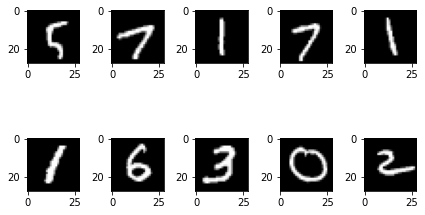

In [ ]:
import matplotlib.pyplot as plt

# plot the first ten image of dataset
for i in range(10):
  plt.subplot(2, 5, i + 1) 
  plt.imshow(X_train[i+100], cmap = 'gray')
#plt.show()
plt.tight_layout()

### Build input vector & normalization
將資料轉換成能夠放入模型的形狀，並進行標準化

In [ ]:
# building the input vector
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalization
X_train /= 255
X_test /= 255

### one-hot encoding of label

將label進行one-hot，讓模型知道要進行類別的預測

In [ ]:
num_class = 10
Y_train = np_utils.to_categorical(Y_train, num_class) #[0,0,0,0,0,0,0,0,0,0,1]
Y_test = np_utils.to_categorical(Y_test, num_class) 
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Build Model

input shape只需要在一開始建立模型時定義即可。
flatten將資料維度攤平成一維，才可以放入Neural Network模型。

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(10, activation = 'softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*64+64

50240

## Train model
進行**類別預測**時，loss function使用categorical crossentropy

In [ ]:
128*469

60032

In [ ]:
model1.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
train_history1 = model1.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_data = (X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 2.5713 - accuracy: 0.2908 - val_loss: 1.5408 - val_accuracy: 0.4602
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 1.3270 - accuracy: 0.5329 - val_loss: 1.2353 - val_accuracy: 0.5541
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 1.0660 - accuracy: 0.6002 - val_loss: 1.0317 - val_accuracy: 0.6478
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8944 - accuracy: 0.6741 - val_loss: 0.9002 - val_accuracy: 0.6932
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7284 - accuracy: 0.7356 - val_loss: 0.7298 - val_accuracy: 0.7483
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5988 - accuracy: 0.8010 - val_loss: 0.5764 - val_accuracy: 0.8501
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4535 - accuracy: 0.8819 - val_loss: 0.4574 - val_accuracy: 0.9047
Epoch 

In [ ]:
model1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1057 - accuracy: 0.9706


[0.10568011552095413, 0.9706000089645386]

## 存Model

In [ ]:
from keras.models import load_model
model1.save('DNN.h5') #儲存model的架構及參數
model3 = load_model('./DNN.h5') #載入已儲存的模型檔
model3.summary() #確認一下是不是要載入的模型

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


## 參數調整

In [ ]:
model1.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
train_history3 = model1.fit(X_train, Y_train, batch_size = 200, epochs = 10, validation_data = (X_test, Y_test))
model1.evaluate(X_test, Y_test)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9882 - val_loss: 0.0860 - val_accuracy: 0.9746
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0348 - accuracy: 0.9899 - val_loss: 0.0871 - val_accuracy: 0.9758
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9904 - val_loss: 0.0871 - val_accuracy: 0.9764
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.0893 - val_accuracy: 0.9740
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0250 - accuracy: 0.9930 - val_loss: 0.0928 - val_accuracy: 0.9738
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0219 - accuracy: 0.9941 - val_loss: 0.0901 - val_accuracy: 0.9747
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 0.0929 - val_accuracy: 0.9741
Epoch 

[0.0948621854186058, 0.9749000072479248]

### Draw Graph

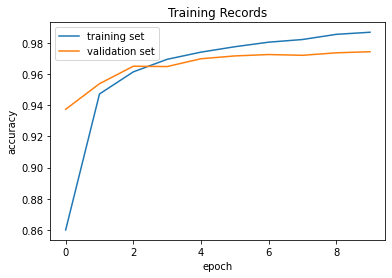

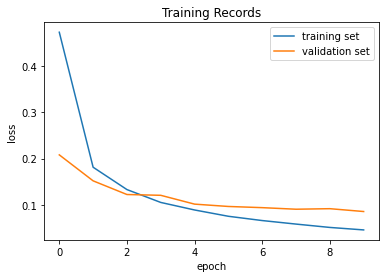

In [ ]:
# draw accuracy curve
plt.plot(train_history1.history['accuracy'], label = 'training set')
plt.plot(train_history1.history['val_accuracy'], label = 'validation set')
plt.title('Training Records')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'best')
plt.show()

# draw loss curve
plt.plot(train_history1.history['loss'], label = 'training set')
plt.plot(train_history1.history['val_loss'], label = 'validation set')
plt.title('Training Records')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 'best')
plt.show()

### Compare with answer

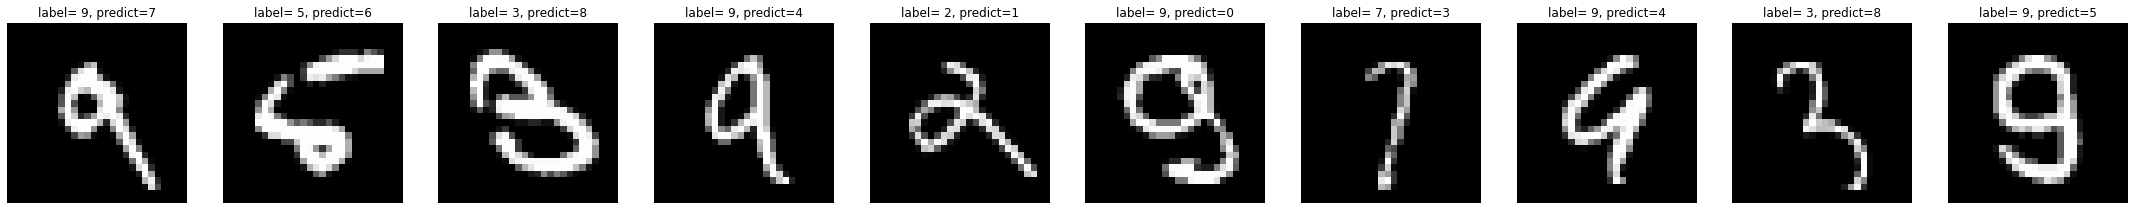

In [ ]:
import numpy as np
figure = plt.figure(figsize=(38,20))
col = 1
predict = model1.predict(X_test) #回傳model預測X_test為0-9各自的機率
predict = np.argmax(predict,axis=1) #把機率最大的當作prediction，位置就會是對應的數字
for i in range(len(Y_test)):
  if np.argmax(Y_test[i])!=predict[i]:
    figure.add_subplot(1,10,col)
    plt.title(f"label= {np.argmax(Y_test[i])}, predict={predict[i]}")
    plt.axis("off")
    plt.imshow(X_test[i].reshape(28,28),cmap='gray')
    col+=1
  if col>10:
    break


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Draw Confusion Matrix

In [ ]:
import pandas as pd
pd.crosstab(np.argmax(Y_test,axis=1), predict, rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,966,0,0,0,0,1,8,1,1,3
1,0,1121,3,2,0,0,2,1,6,0
2,7,3,996,6,1,0,4,8,7,0
3,0,0,4,983,0,6,0,6,6,5
4,1,0,1,1,964,0,7,3,1,4
5,3,2,0,11,3,861,6,2,2,2
6,4,3,0,2,4,4,939,0,2,0
7,2,4,9,2,1,0,0,1003,2,5
8,6,0,2,5,5,3,4,2,944,3


## Task 2 預測股價漲跌 (binary classification)
取20日收盤價的daily return作為輸入特徵 \\
預測未來5日是漲還是跌



從yahoo finance 下載資料

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
ticker = '2330.tw'
df = yf.download(ticker,start='2017-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,181.5,183.5,181.0,183.0,154.108215,22630000
2017-01-04,183.0,184.0,181.5,183.0,154.108215,24369000
2017-01-05,182.0,183.5,181.5,183.5,154.529282,20979000
2017-01-06,184.0,184.5,183.5,184.0,154.950363,22443000
2017-01-09,184.0,185.0,183.0,184.0,154.950363,18569000
...,...,...,...,...,...,...
2022-08-15,520.0,524.0,519.0,523.0,523.000000,21273166
2022-08-16,526.0,526.0,523.0,525.0,525.000000,20720414
2022-08-17,524.0,527.0,521.0,527.0,527.000000,27143102


Text(0.5, 1.0, '2330.tw')

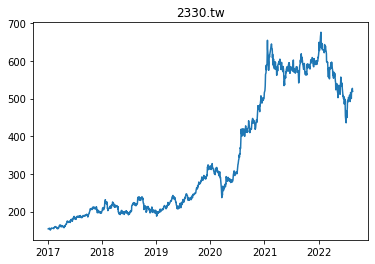

In [ ]:
#繪出股價走勢
plt.plot(df['Adj Close'])
plt.title(ticker)

In [ ]:
#將所有資料切成訓練集、驗證集、測試集
train_data = df[:'2018-01-01']
validation_data = df['2020-01-01':'2021-01-01']
test_data = df['2021-01-01':'2022-01-01']
print('train_data.shape',train_data.shape)
print('validation_data.shape',validation_data.shape)
print('test_data.shape',test_data.shape)

train_data.shape (243, 6)
validation_data.shape (245, 6)
test_data.shape (243, 6)


將每個時間區段的價格切成feature與label

In [ ]:
import numpy as np
lookback = 20 #看過去20天
forecast = 5 #預測未來5天

def split_data_return(df,lookback,forecast):
  x = []
  y = []
  daily_return = df['Adj Close'].pct_change().fillna(0) #計算daily return (今日價格-昨日價格)/(昨日價格)
  for i in range(len(daily_return)-lookback-forecast):
    x.append(daily_return[i: i+lookback].values)
    future_return = df['Adj Close'].iloc[i+lookback+forecast]/df['Adj Close'].iloc[i+lookback] #未來第五天除以第一天的價格
    y.append(1 if future_return > 1 else 0)
  return np.array(x),np.array(y)

x_train,y_train = split_data_return(train_data,lookback,forecast)
x_validation,y_validation = split_data_return(validation_data,lookback,forecast)
x_test,y_test = split_data_return(test_data,lookback,forecast)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Dense(32, input_shape=(20,),activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
train_history1 = model.fit(x_train, y_train, batch_size = 64, epochs = 100,validation_data=(x_validation,y_validation))

Epoch 1/100
4/4 [==============================] - 7s 118ms/step - loss: 0.6934 - accuracy: 0.4220 - val_loss: 0.6936 - val_accuracy: 0.4409
Epoch 2/100
4/4 [==============================] - 0s 29ms/step - loss: 0.6930 - accuracy: 0.5413 - val_loss: 0.6930 - val_accuracy: 0.5045
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6926 - accuracy: 0.5780 - val_loss: 0.6924 - val_accuracy: 0.5636
Epoch 4/100
4/4 [==============================] - 0s 34ms/step - loss: 0.6922 - accuracy: 0.5505 - val_loss: 0.6920 - val_accuracy: 0.5727
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: 0.6920 - accuracy: 0.5505 - val_loss: 0.6915 - val_accuracy: 0.5864
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 0.6917 - accuracy: 0.5505 - val_loss: 0.6910 - val_accuracy: 0.5864
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 0.6913 - accuracy: 0.5505 - val_loss: 0.6904 - val_accuracy: 0.5909
Epoch 8/100
4/4 [==

In [ ]:
plt.plot(train_history1.history['loss'], label = 'training set')
plt.plot(train_history1.history['val_loss'], label = 'validation set')
plt.title('Training Records')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 'best')
plt.show()
model.evaluate(x_test, y_test)

## Task 3:預測波動率大小
取20日收盤價的daily return作為輸入特徵 \\
預測未來5日波動率比今天大還是小

In [ ]:
def split_data_volatility(df,lookback,forecast):
  x = []
  y = []
  daily_return = df['Adj Close'].pct_change().fillna(0)
  for i in range(len(daily_return)-lookback-forecast):
    x.append(daily_return[i: i+lookback].values)
    past_vol = daily_return.iloc[i+lookback-forecast:i+lookback].values.std()
    future_vol = daily_return.iloc[i+lookback:i+lookback+forecast].values.std()
    y.append(1 if future_vol>past_vol else 0)
  return np.array(x),np.array(y)
x_train,y_train = split_data_volatility(train_data,lookback,forecast)
x_validation,y_validation = split_data_return(validation_data,lookback,forecast)
x_test,y_test = split_data_volatility(test_data,lookback,forecast)

In [ ]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
train_history1 = model.fit(x_train, y_train, batch_size = 64, epochs = 100,validation_data=(x_validation,y_validation))

In [ ]:
model.evaluate(x_test, y_test)